In [21]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [72]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target']=data.target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# data analysis

In [9]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'sepal length')

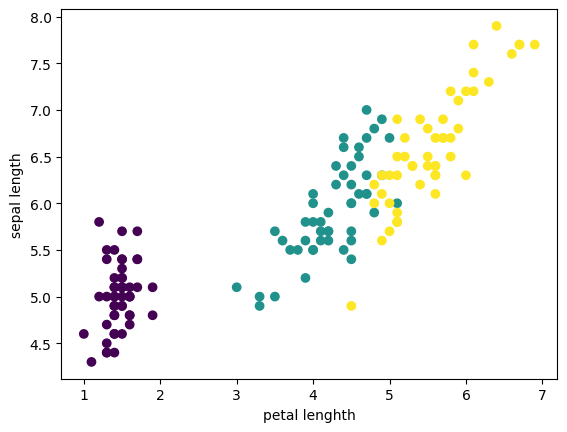

In [19]:
plt.scatter(df['petal length (cm)'],df['sepal length (cm)'],c=data.target)
plt.xlabel('petal lenghth')
plt.ylabel('sepal length')


Text(0, 0.5, 'sepal width')

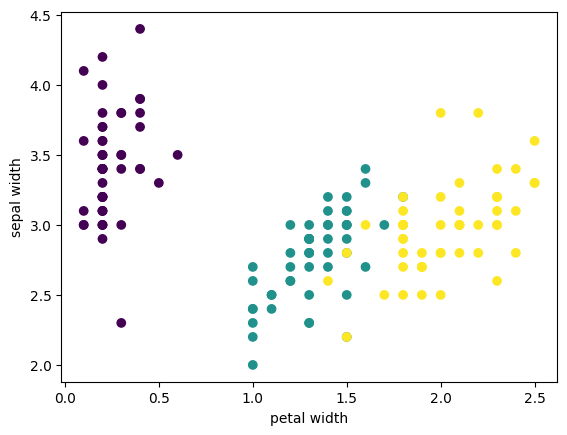

In [20]:
plt.scatter(df['petal width (cm)'],df['sepal width (cm)'],c=data.target)
plt.xlabel('petal width')
plt.ylabel(('sepal width'))

## detecting outliers 

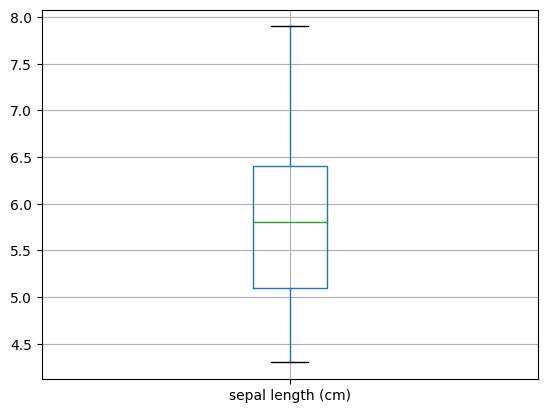

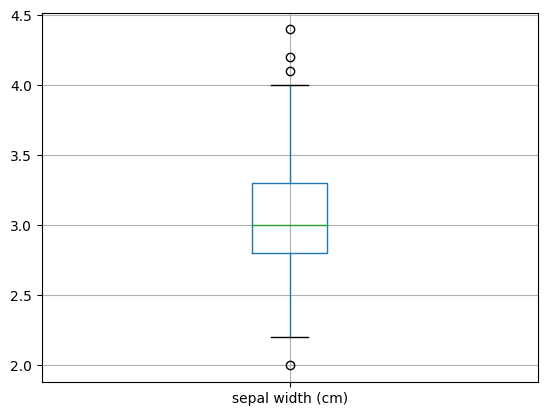

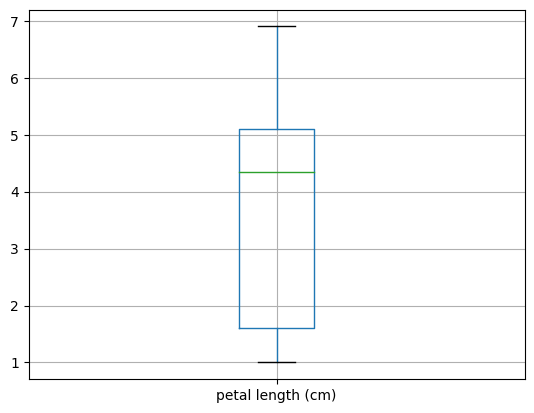

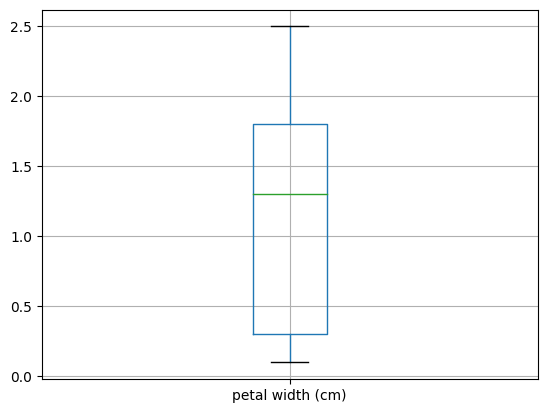

In [68]:
df.boxplot(column='sepal length (cm)')
plt.show()
df.boxplot(column='sepal width (cm)')
plt.show()
df.boxplot(column='petal length (cm)')
plt.show()
df.boxplot(column='petal width (cm)')
plt.show()

# guassian transformation

In [6]:
import scipy.stats as stat
import pylab 
from matplotlib import pyplot as plt

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

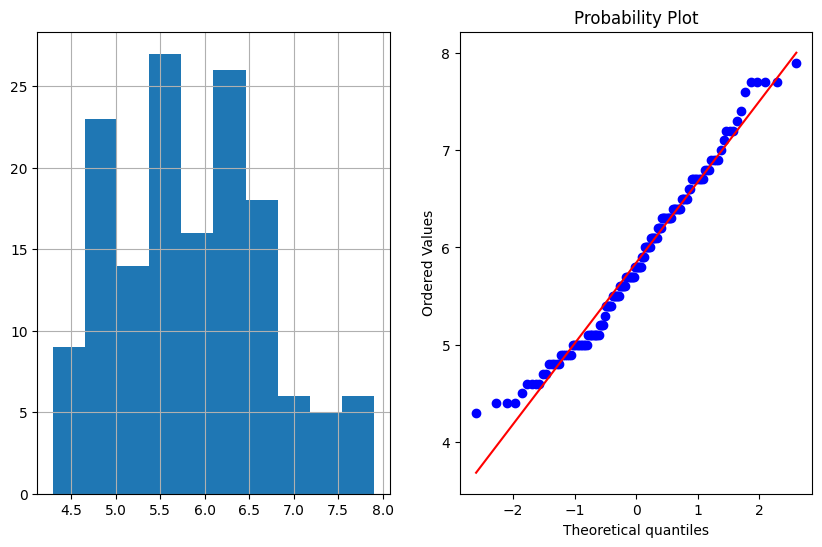

In [7]:
plot_data(df,'sepal length (cm)')

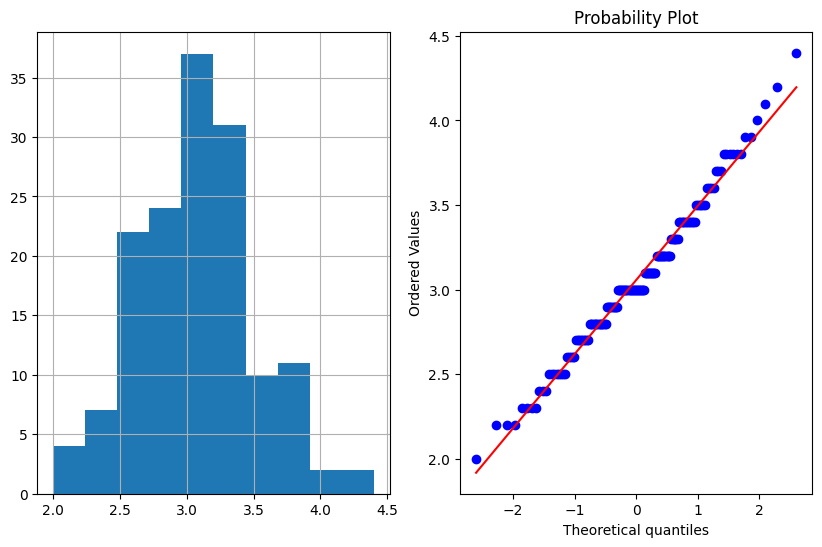

In [8]:
plot_data(df,'sepal width (cm)')

# feature scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [25]:
df1=df.drop('target',axis=1)

In [26]:
df2=scaler.fit_transform(df1)

# splitting the data

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df2,df['target'],test_size=0.2
                                        )


# training the model

In [47]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)


LogisticRegression()

In [48]:
model1.score(xtest,ytest)

0.9

In [49]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()

In [50]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [51]:
model2.score(xtest,ytest)

0.9333333333333333

In [56]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=6)

In [57]:
model3.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=6)

In [58]:
model3.score(xtest,ytest)

0.9333333333333333

#  accuracy 

In [55]:
from sklearn.metrics import r2_score
r2_score(model1.predict(xtest),ytest)


0.8628048780487805

In [59]:
r2_score(model2.predict(xtest),ytest)

0.9118942731277533

In [60]:
r2_score(model3.predict(xtest),ytest)

0.9118942731277533

## evaluation

Text(50.722222222222214, 0.5, 'original')

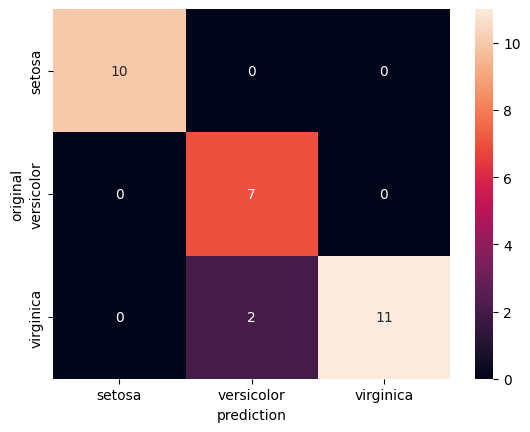

In [76]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(model2.predict(xtest),ytest)
sns.heatmap(mat,annot=True,xticklabels=['setosa', 'versicolor', 'virginica'],yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('prediction')
plt.ylabel('original')


### result:

result:
    decision tree and random forest gives a score of 0.9111